In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
image_path = "images\\5bb_solarcell.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [20]:
# Preprocessing
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(gray, 50, 100)

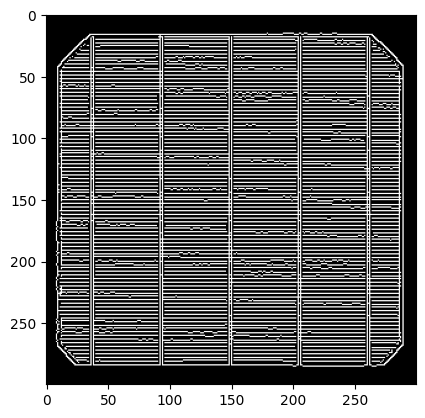

In [21]:
plt.imshow(edges, cmap='gray')

In [22]:
# Line detection using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

In [23]:
# Separate bus bars and fingers based on orientation
bus_bars = []
fingers = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.abs(np.arctan2((y2 - y1), (x2 - x1)) * 180 / np.pi)
        if angle < 10 or angle > 170:  # Near-horizontal lines
            fingers.append((x1, y1, x2, y2))
        elif 80 < angle < 100:  # Near-vertical lines
            bus_bars.append((x1, y1, x2, y2))

In [24]:
# Find intersections between bus bars and fingers
def find_intersection(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2

    # Line equations
    A1 = y2 - y1
    B1 = x1 - x2
    C1 = A1 * x1 + B1 * y1

    A2 = y4 - y3
    B2 = x3 - x4
    C2 = A2 * x3 + B2 * y3

    determinant = A1 * B2 - A2 * B1

    if determinant == 0:
        return None  # Parallel lines

    # Intersection point
    x = (B2 * C1 - B1 * C2) / determinant
    y = (A1 * C2 - A2 * C1) / determinant
    return int(x), int(y)

In [25]:
intersections = []
for bus_bar in bus_bars:
    for finger in fingers:
        intersection = find_intersection(bus_bar, finger)
        if intersection:
            intersections.append(intersection)

In [26]:
# Visualize the results
output_image = image.copy()
for x1, y1, x2, y2 in bus_bars:
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
for x1, y1, x2, y2 in fingers:
    cv2.line(output_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
for x, y in intersections:
    cv2.circle(output_image, (x, y), 5, (0, 0, 255), -1)

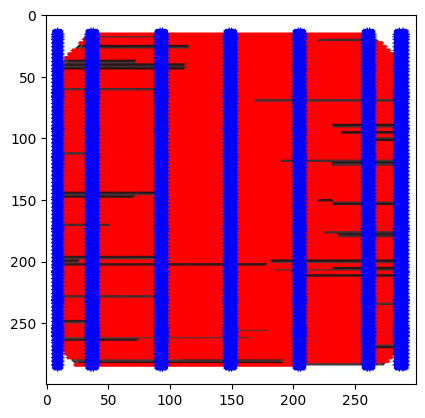

In [27]:
plt.imshow(output_image)

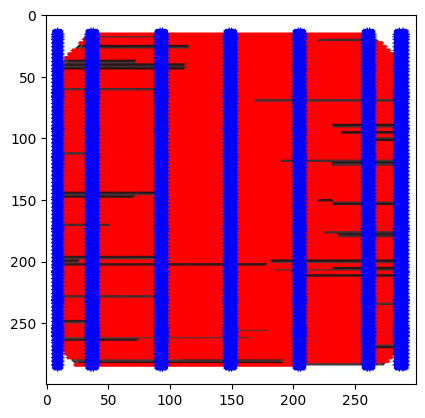

In [28]:
# Save and display
cv2.imwrite("/mnt/data/detected_lines.png", output_image)
#cv2.imshow("Detected Lines and Intersections", output_image)
plt.imshow(output_image)

In [30]:
# Create a blank white grid
grid_height, grid_width = gray.shape
grid_image = np.ones((grid_height, grid_width, 3), dtype=np.uint8) * 255

# Draw bus bars, fingers, and intersections on the grid
for x1, y1, x2, y2 in bus_bars:
    cv2.line(grid_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for bus bars
for x1, y1, x2, y2 in fingers:
    cv2.line(grid_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue for fingers
for x, y in intersections:
    cv2.circle(grid_image, (x, y), 5, (0, 0, 255), -1)  # Red dots for intersections


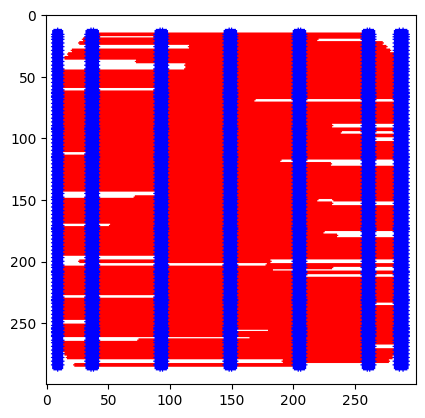

In [31]:
plt.imshow(grid_image)